# Assignment I - The Aiyagari Model

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Q2: Calibrate steady state](#toc2_)    
- 3. [Q3: Partial equilibrium effects of tax changes](#toc3_)    
- 4. [Q4: Tax reform](#toc4_)    
- 5. [Q5: Transition path](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [297]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [298]:
model = HANCModelClass(name='baseline') # create an instance of the model
model.setup() # setup

## 2. <a id='toc2_'></a>[Q2: Calibrate steady state](#toc0_)

In [299]:
model.find_ss(do_print=True, calibrate=True) # <- need to be updated in order to run!

Implied K =  5.154
Implied Y =  1.718
Implied K/Y =  3.000
Discrepancy in A =   0.00000000
Discrepancy in L =   0.00000000
Discrepancy in Y =   0.00000000
Discrepancy in G =  -0.00000000
found steady state in 4.0 secs


In [300]:
#Show parameter values
print(f"Parameter values at steady state: \nbeta={model.par.beta:.2f}, transfer={model.ss.transfer:.2f}, K={model.ss.K:.2f}, vphi={model.par.vphi:.2f}")
#Show aggregate quantities and prices, ss.A, ss.C, ss.I, ss.L, ss.Y, ss.r, ss.w
print(f"Steady state aggregate quantities and prices: \nA = {model.ss.A:.2f}, C = {model.ss.C_hh:.2f}, I = {model.ss.I:.2f}, L = {model.ss.L:.2f}, Y = {model.ss.Y:.2f}, r = {model.ss.r:.2f}, w = {model.ss.w:.2f}")
#Calculate and show gini coefficient
model.ss.a

Parameter values at steady state: 
beta=0.93, transfer=0.37, K=5.15, vphi=0.35
Steady state aggregate quantities and prices: 
A = 5.15, C = 1.41, I = 0.31, L = 1.00, Y = 1.72, r = 0.05, w = 1.15


array([[[0.00000000e+00, 0.00000000e+00, 2.44937380e-04, ...,
         3.26248660e+02, 4.91095796e+02, 9.85622399e+02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.26244735e+02, 4.91093634e+02, 9.85621519e+02],
        [2.59205929e-02, 3.45237233e-02, 4.34216272e-02, ...,
         3.26238842e+02, 4.91090390e+02, 9.85620203e+02],
        [6.19202661e-01, 6.29220371e-01, 6.39307272e-01, ...,
         3.26232914e+02, 4.91086748e+02, 9.85618479e+02],
        [2.73381927e+00, 2.74372991e+00, 2.75370764e+00, ...,
         3.26254101e+02, 4.91094600e+02, 9.85619060e+02]]])

Average assets at 20th percentile: 0.00
Average assets at 80th percentile: 8.44
Ratio of assets at 80th percentile to assets at 20th percentile: 4982.95


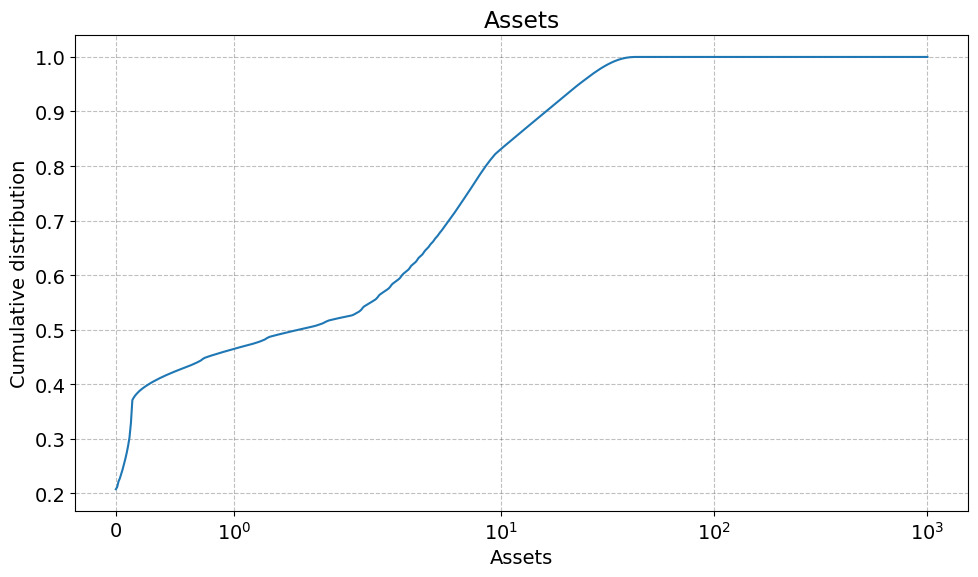

In [301]:
par=model.par
ss=model.ss

#Calculates the Percentile 80-20 ratio of assets: 
cdf=np.cumsum(np.sum(ss.D,axis=1))
#locate index of the 10th percentile
index_20=np.where(cdf>0.2)[0][0]
index_80=np.where(cdf>0.8)[0][0]
#What are assets at the 20th and 80th percentile?
distribution_20=ss.D[0,:,index_20]/np.sum(ss.D[0,:,index_20])
distribution_80=ss.D[0,:,index_80]/np.sum(ss.D[0,:,index_80])
avg_assets_at_20=np.sum(distribution_20*ss.a[0,:,index_20])
avg_assets_at_80=np.sum(distribution_80*ss.a[0,:,index_80])
print(f"Average assets at 20th percentile: {avg_assets_at_20:.2f}")
print(f"Average assets at 80th percentile: {avg_assets_at_80:.2f}")
ratio_assets=avg_assets_at_80/avg_assets_at_20
print(f"Ratio of assets at 80th percentile to assets at 20th percentile: {ratio_assets:.2f}")

#Plot cdf og assets against asset grid
plt.figure(figsize=(10,6))
plt.plot(par.a_grid,cdf)
plt.xlabel('Assets')
plt.ylabel('Cumulative distribution')
plt.xscale('symlog')
plt.title('Assets')
plt.tight_layout()
plt.savefig('figs/distribution.pdf')
plt.show()

## 3. <a id='toc3_'></a>[Q3: Partial equilibrium effects of tax changes](#toc0_)

In [302]:
## CODE HERE ##
model.find_ss(do_print=True, calibrate=False) # <- need to be updated in order to run!

Implied K =  5.154
Implied Y =  1.718
Implied K/Y =  3.000
Discrepancy in A =  -0.00000000
Discrepancy in L =   0.00000000
Discrepancy in Y =   0.00000000
Discrepancy in G =   0.00000000
found steady state in 3.7 secs


In [303]:
print(f"r = {model.ss.r:.2f}, w = {model.ss.w:.2f}")
print(f"tau_a = {model.ss.tau_a:.2f}, tau_l = {model.ss.tau_l:.2f}")

r = 0.05, w = 1.15
tau_a = 0.10, tau_l = 0.30


In [304]:
#Calculate consumption, savings and labor supply for different changes to tau_a holding tau_l fixed and the other way around
consumption_list_vary_tau_a=np.zeros(5)
savings_list_vary_tau_a=np.zeros(5)
labor_list_vary_tau_a=np.zeros(5)
consumption_list_vary_tau_l=np.zeros(5)
savings_list_vary_tau_l=np.zeros(5)
labor_list_vary_tau_l=np.zeros(5)
tau_a_list=tau_l_list=[0.1,0.2,0.3,0.4,0.5]

#Set up lists of tau_a and tau_l values
for i,tau in enumerate(tau_a_list):
    model_ = model.copy()
    #set new tau values
    model_.par.tau_a_ss=model_.ss.tau_a= tau
    model_.par.tau_l_ss=model_.ss.tau_l=0.3
    model_.solve_hh_ss()
    model_.simulate_hh_ss()

    #print(f"tau_a = {model_.par.tau_a_ss}, tau_l = {model_.par.tau_l_ss}")
    #save consumption consumption, savings and labor supply and plot across iterations.
    consumption_list_vary_tau_a[i]=model_.ss.C_hh
    savings_list_vary_tau_a[i]=model_.ss.A_hh
    labor_list_vary_tau_a[i]=model_.ss.L_hh

    model_ = model.copy()
    #set new tau values
    model_.par.tau_a_ss=model_.ss.tau_a= 0.3
    model_.par.tau_l_ss=model_.ss.tau_l=tau
    model_.solve_hh_ss()
    model_.simulate_hh_ss()

    #print(f"tau_a = {model_.par.tau_a_ss}, tau_l = {model_.par.tau_l_ss}")
    #save consumption consumption, savings and labor supply and plot across iterations.
    consumption_list_vary_tau_l[i]=model_.ss.C_hh
    savings_list_vary_tau_l[i]=model_.ss.A_hh
    labor_list_vary_tau_l[i]=model_.ss.L_hh

print(consumption_list_vary_tau_a,savings_list_vary_tau_a,labor_list_vary_tau_a)
print(consumption_list_vary_tau_l,savings_list_vary_tau_l,labor_list_vary_tau_l)

[1.40868494 1.36891688 1.34063554 1.32028178 1.3054624 ] [5.15372541 4.12842048 3.32739338 2.69549238 2.1887382 ] [1.         1.03352711 1.05884266 1.0777582  1.09181672]
[1.56015593 1.45250674 1.34063554 1.22386158 1.10120221] [4.29958804 3.82014162 3.32739338 2.82285259 2.30422576] [1.00260964 1.02925135 1.05884266 1.09179609 1.12856095]


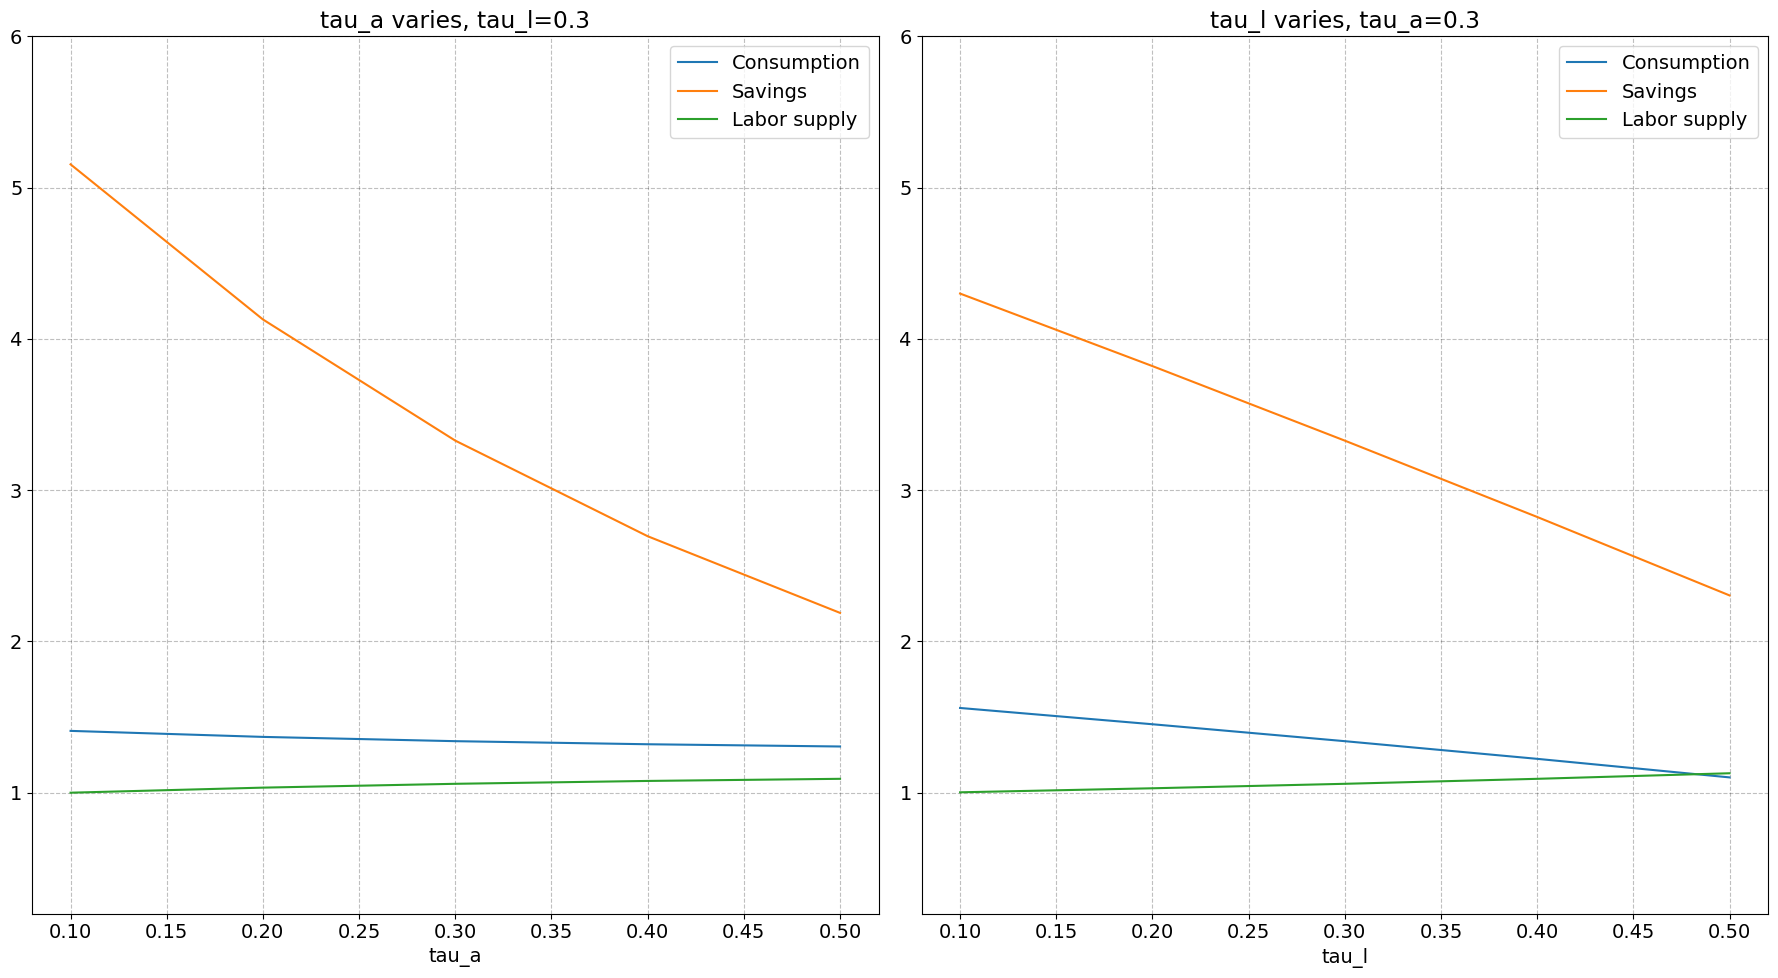

In [305]:
#Plot consumption, savings and labor supply against changes in tau_a and tau_l, in same figure different panels
fig,ax=plt.subplots(1,2,figsize=(18,10))
ax[0].plot(tau_a_list,consumption_list_vary_tau_a,label='Consumption')
ax[0].plot(tau_a_list,savings_list_vary_tau_a,label='Savings')
ax[0].plot(tau_a_list,labor_list_vary_tau_a,label='Labor supply')
ax[0].set_xlabel('tau_a')
ax[0].set_title('tau_a varies, tau_l=0.3')
ax[0].legend()
ax[1].plot(tau_l_list,consumption_list_vary_tau_l,label='Consumption')
ax[1].plot(tau_l_list,savings_list_vary_tau_l,label='Savings')
ax[1].plot(tau_l_list,labor_list_vary_tau_l,label='Labor supply')
ax[1].set_xlabel('tau_l')
ax[1].set_title('tau_l varies, tau_a=0.3')
ax[1].legend()
ax[0].set_ylim(0.2,6)
ax[1].set_ylim(0.2,6)
plt.tight_layout()
plt.savefig('figs/consumption_savings_labor.pdf')
plt.show()

## 4. <a id='toc4_'></a>[Q4: Tax reform](#toc0_)

Raise capital tax from 10% to 50%

In [306]:
#print transfer, and taxes
print(f"Transfer: {model.ss.transfer}")
print(f"Tax on capital: {model.ss.tau_a}")
print(f"Tax on labor: {model.ss.tau_l}")

Transfer: 0.3710682295043818
Tax on capital: 0.1
Tax on labor: 0.2999999999999368


In [307]:
model_high_tax = model.copy()
model_high_tax.par.tau_a_ss = 0.5 

Find new steady state 

In [308]:
model_high_tax.find_ss(do_print=True, calibrate=False) # <- need to be updated in order to run!)

Implied K =  3.889
Implied Y =  1.607
Implied K/Y =  2.421
Discrepancy in A =  -0.00000000
Discrepancy in L =   0.00000000
Discrepancy in Y =   0.00000000
Discrepancy in G =   0.00000000
found steady state in 3.5 secs


In [309]:
print(f"Transfer: {model_high_tax.ss.transfer}")
print(f"Tax on capital: {model_high_tax.ss.tau_a}")
print(f"Tax on labor: {model_high_tax.ss.tau_l}")

Transfer: 0.3710682295043818
Tax on capital: 0.5
Tax on labor: 0.2068579469210618


In [310]:
model.test_ss(do_warnings=True)

Gamma          :       1.0000
K              :       5.1537
L              :       1.0000
rK             :       0.1100
w              :       1.1510
Y              :       1.7179
A              :       5.1537
r              :       0.0500
transfer       :       0.3711
tau_l          :       0.3000
tau_a          :       0.1000
A_hh           :       5.1537
C_hh           :       1.4087
ELL_hh         :       1.0570
L_hh           :       1.0000
TAXES_hh       :       0.3711
V_hh           :      -1.8928
I              :       0.3092
clearing_A     :      -0.0000
clearing_L     :       0.0000
clearing_Y     :       0.0000
clearing_G     :       0.0000


In [311]:
model_high_tax.test_ss(do_warnings=True)

Gamma          :       1.0000
K              :       3.8886
L              :       1.0394
rK             :       0.1363
w              :       1.0355
Y              :       1.6065
A              :       3.8886
r              :       0.0763
transfer       :       0.3711
tau_l          :       0.2069
tau_a          :       0.5000
A_hh           :       3.8886
C_hh           :       1.3732
ELL_hh         :       1.1100
L_hh           :       1.0394
TAXES_hh       :       0.3711
V_hh           :      -2.4256
I              :       0.2333
clearing_A     :      -0.0000
clearing_L     :       0.0000
clearing_Y     :       0.0000
clearing_G     :       0.0000


In [312]:
#Print output before and after reform:
print(f"Output before reform: {model.ss.Y}")
print(f"Output after reform: {model_high_tax.ss.Y}")
#Compute and print average welfare before and after reform:
print(f"Average welfare before reform: {np.sum(model.ss.D*model.ss.v)}")
print(f"Average welfare after reform: {np.sum(model_high_tax.ss.D*model_high_tax.ss.v)}")

Output before reform: 1.7179084699867568
Output after reform: 1.6065083261374506
Average welfare before reform: -1.8928351950369011
Average welfare after reform: -2.4255583323877836


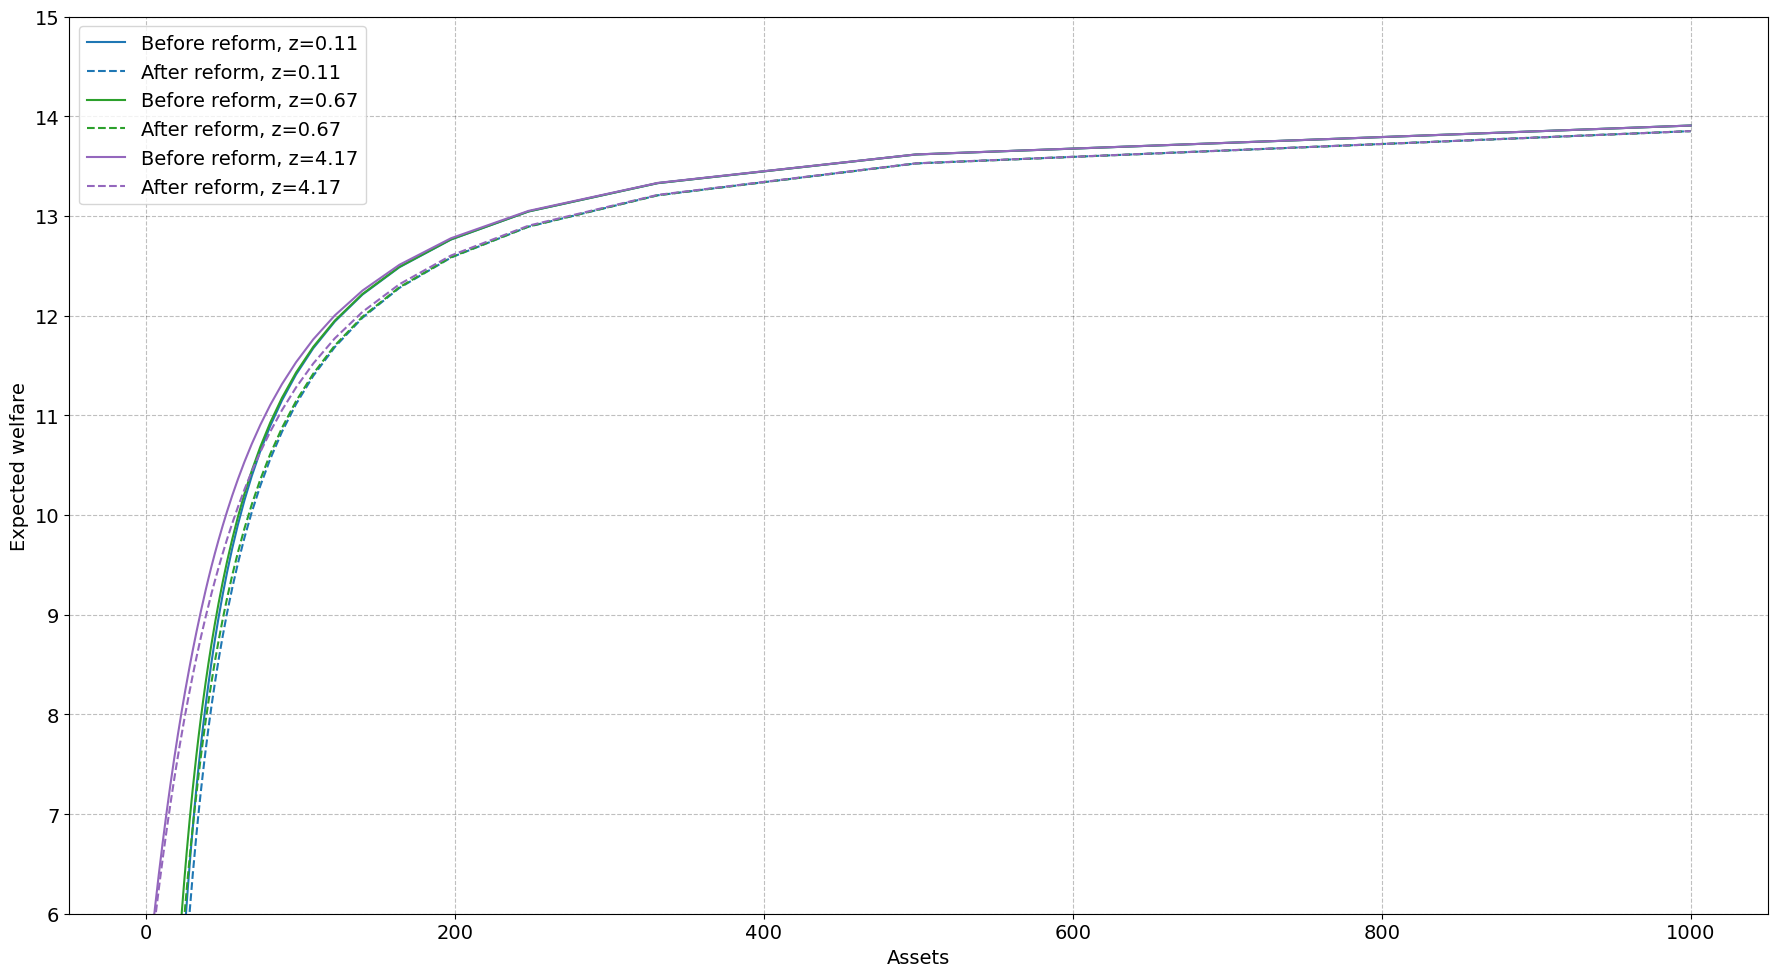

In [313]:
par=model.par
ss=model.ss

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
line_styles = ['-', '--', '-.', ':']

for i_z in [0, 2, 4]:
    ax.plot(par.a_grid, model.ss.v[0, i_z, :], label=f'Before reform, z={par.z_grid[i_z]:.2f}', color=colors[i_z % len(colors)], linestyle=line_styles[0])
    ax.plot(par.a_grid, model_high_tax.ss.v[0, i_z, :], label=f'After reform, z={par.z_grid[i_z]:.2f}', color=colors[i_z % len(colors)], linestyle=line_styles[1])

ax.legend()
ax.set_ylim(6, 15)
ax.set_xlabel('Assets')
ax.set_ylabel('Expected welfare')
plt.tight_layout()
plt.savefig('figs/welfare_distribution.pdf')
plt.show()

## 5. <a id='toc5_'></a>[Q5: Transition path](#toc0_)

Ensure that transition path blocks are consistent with steady states 

Transition

note: inputs = steady state value -> expected: constant value (straigt line) in roughly -10^-5 to 10^5

household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.6 secs

note: inputs = steady state value -> expected: constant value (straigt line) in roughly -10^-5 to 10^5

household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.2 secs



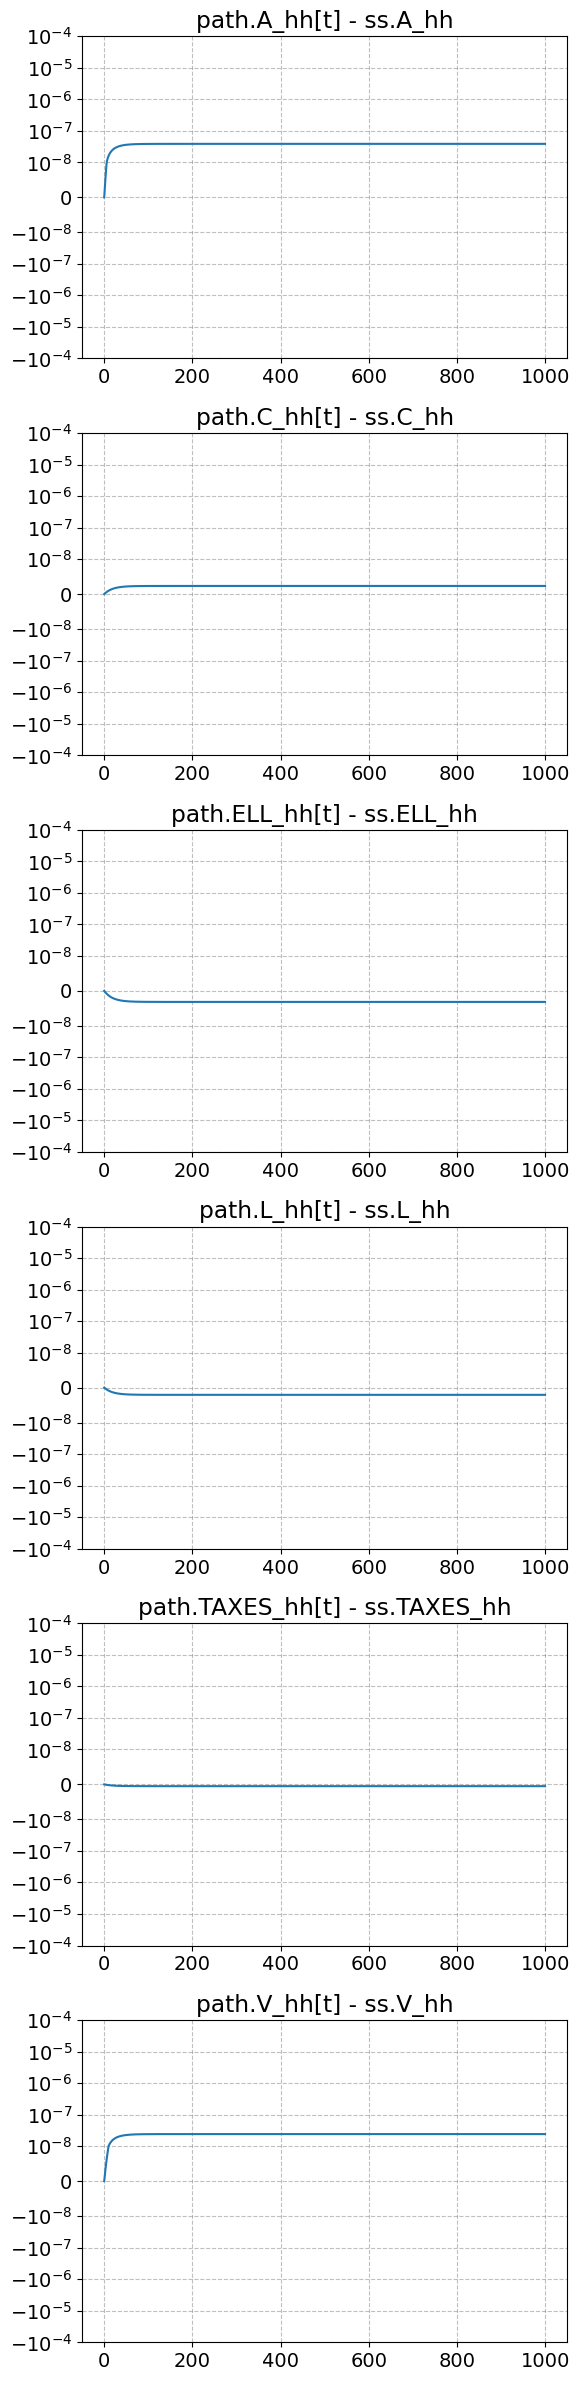

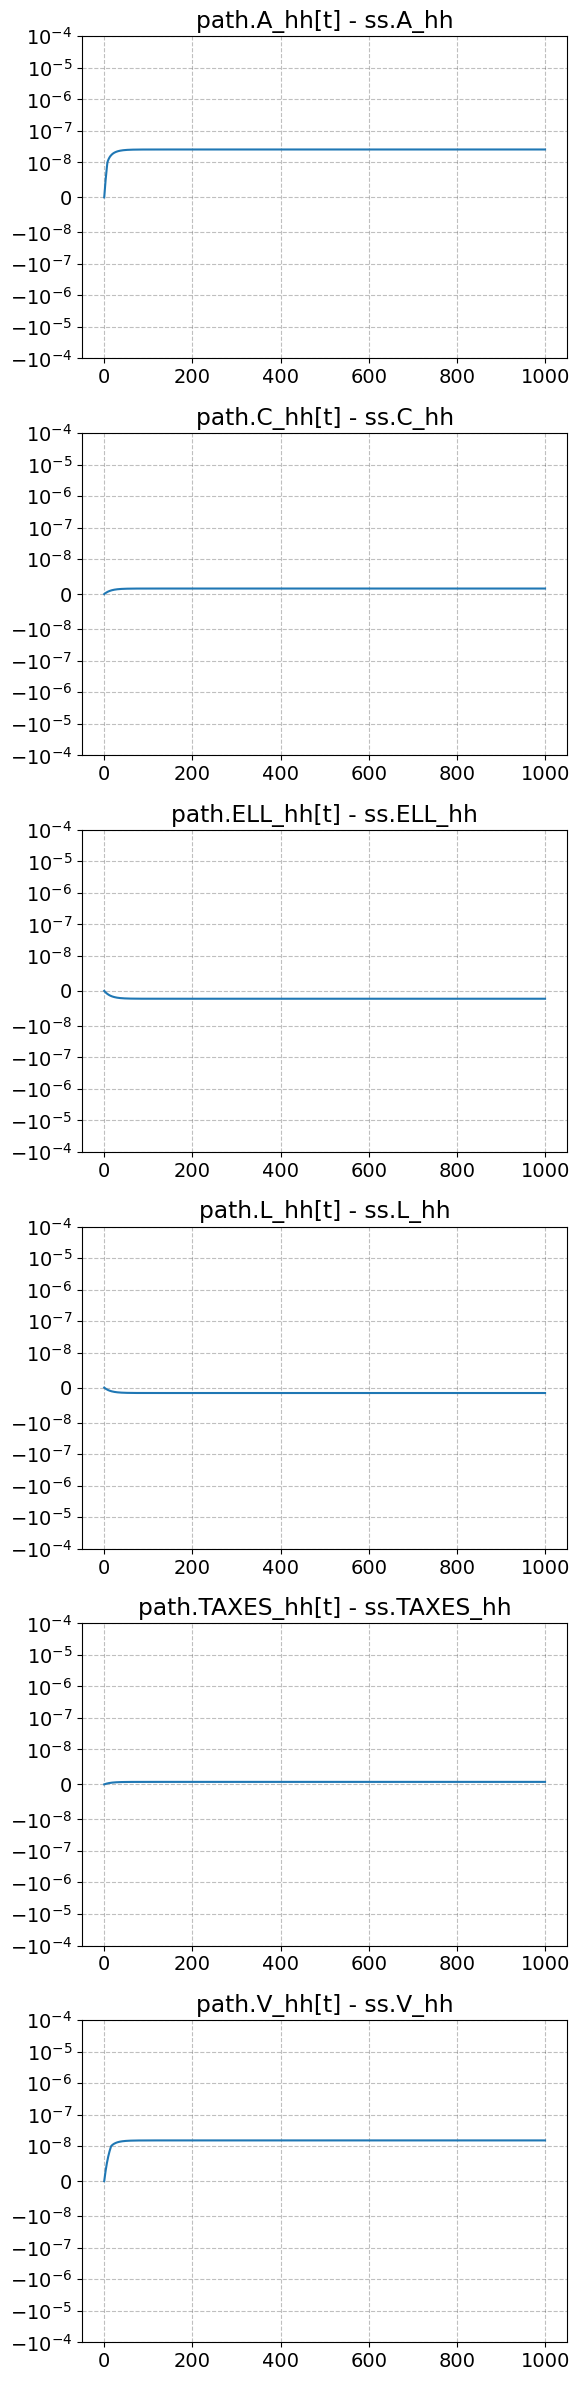

In [314]:
model.test_hh_path()
model_high_tax.test_hh_path()

In [319]:
model.find_transition_path(shocks=['tau_a'],do_print=True)
model.test_path()
#Se HANC.ipynb og HANCModel.py i GEModelToolsNotebooks.
#Jeg tror at tau_a skal stå som shock, og at vi skal finde clearing conditions i blocks.py. 
#Potentielt skal vi selv tilføje "clearing_transfer" el.

AssertionError: shocks have element tau_a, not in .shocks = []